In [113]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [114]:
%matplotlib inline

In [115]:
mpl.rcParams["figure.figsize"] = (4,4)
mpl.rcParams["axes.grid"] = False

## Implementing the Logistic Regression Algorithm from scratch

In [7]:
# Defining the sigmoid function, which is at the heart of logistic regression

def sigmoid(input):
    return 1/(1 + np.exp(-input))

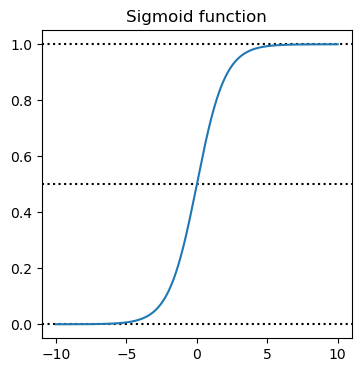

In [23]:
## Plotting the sigmoid function

inputs = np.linspace(-10,10,1000)
outputs = [sigmoid(_) for _ in inputs]
plt.axhline(1, color = "black", linestyle = "dotted")
plt.axhline(0.5, color = "black", linestyle = "dotted")
plt.axhline(0, color = "black", linestyle = "dotted")
plt.plot(inputs, outputs)
plt.title("Sigmoid function")
plt.show()

In [25]:
## Defining a function to compute predictions

def compute_prediction(X_train, weights):
    pred_z = np.dot(X_train, weights)
    pred_prob = sigmoid(pred_z)
    return pred_prob

The formula for cost function of logistic regression is:

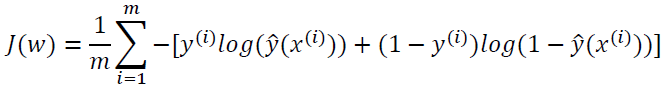

The formula for gradient descent for logistic regression is given below

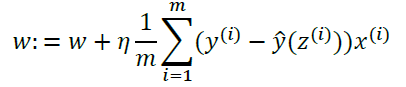

In [36]:
## Defining a function to update the weights using gradient descent formula shown above

def update_weights_gd(X_train, y_train, weights, learning_rate):
    m = y_train.shape[0]
    delta = learning_rate/m * (np.dot(X_train.T, y_train - compute_prediction(X_train, weights)))
    return weights + delta

In [49]:
## Defining a function to compute cost

def compute_cost(X_train, y_train, weights):
    m = y_train.shape[0]
    cost = 1/m * (y_train*np.log(compute_prediction(X_train, weights)) + 
                  (1 - y_train)*np.log(1 - compute_prediction(X_train, weights))
                 )
    return np.sum(cost)*-1

In [195]:
## Defining the function for implementing logistic regression

def train_log_reg(X_train, y_train, learning_rate = 0.1, fit_intercept = True, max_iter = 1000, early_stop = True,
                 del_early_stop = 10**-5):
    if fit_intercept:
        ones = np.ones(X_train.shape[0])
        X_train = np.c_[ones, X_train]
    weights = np.zeros(X_train.shape[1])
    for n in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        if n%100 == 0:
            cost = compute_cost(X_train, y_train, weights)
            print(f"Cost after {n} iterations is {cost:.10f}")
    print(f"Final cost = {cost}")
    return weights

In [328]:
## Checking if the logistic regression 

X_train = np.array([[6, 7],[2, 4],[3, 6],[4, 7],[1, 6],[5, 2],[2, 0],[6, 3],[4, 1],[7, 2]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [329]:
weights = train_log_reg(X_train, y_train, max_iter = 10**3)

Cost after 0 iterations is 0.5744042372
Cost after 100 iterations is 0.0344602234
Cost after 200 iterations is 0.0182655727
Cost after 300 iterations is 0.0124934584
Cost after 400 iterations is 0.0095153291
Cost after 500 iterations is 0.0076933881
Cost after 600 iterations is 0.0064620943
Cost after 700 iterations is 0.0055735118
Cost after 800 iterations is 0.0049016323
Cost after 900 iterations is 0.0043755677
Final cost = 0.004375567740665121


In [330]:
## Writing a function to return the decision boundary for two dimensional logistic regression function
def dec_bound(weights, x):
    return - ((weights[1]/weights[2])*x + (weights[0]/weights[2]))

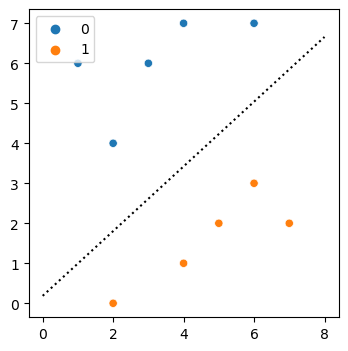

In [331]:
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue = y_train)
plt.plot(np.linspace(0,8,1000), dec_bound(weights, np.linspace(0,8,1000)), linestyle = "dotted", color = "k")
plt.show()

In [128]:
dataset = pd.read_csv("train_300k.csv")

In [129]:
dataset.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [164]:
Y = dataset["click"]
X = dataset.drop(['id', 'click', 'hour', 'device_id', 'device_ip'], axis = 1)

In [165]:
## Taking the first 10000 of datapoints as training data and the rest of datapoints as testing data

train_size = 10000
X_train, y_train = X.iloc[:train_size, :], Y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:, :], Y.iloc[train_size:]

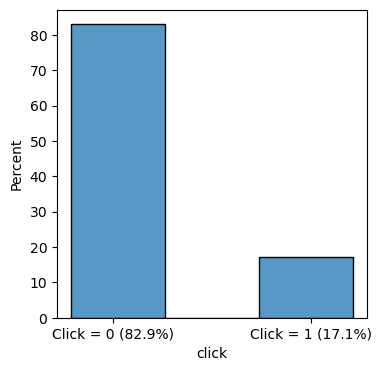

In [166]:
import seaborn as sns
ax = sns.histplot(y_train, bins = 3, stat = "percent")
click_counts = np.unique(y_train, return_counts = True)[1]
ax.set(xticks = [0.15, 0.85], xticklabels = [f"Click = 0 ({click_counts[0]/np.sum(click_counts)*100:.1f}%)", 
                                            f"Click = 1 ({click_counts[1]/np.sum(click_counts)*100:.1f}%)"])
plt.show()

From the above plot, we can see that the classes are imbalanced

In [167]:
## Using One Hot Encoder to transform all the categorical features into binary features

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= "ignore")
X_train = ohe.fit_transform(X_train)
X_train = X_train.toarray()

In [168]:
# One Hot Encoding the test dataset
X_test = ohe.transform(X_test)
X_test = X_test.toarray()

In [224]:
import time
start_time = time.time()
weights = train_log_reg(X_train, y_train, max_iter = 100, learning_rate = 0.01)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for the algorithm to run is {time_taken} seconds")

Cost after 0 iterations is 0.6820016985
Final cost = 0.6820016984981645
Time taken for the algorithm to run is 28.61005711555481 seconds


In [225]:
from sklearn.metrics import roc_auc_score
preds = compute_prediction(np.c_[np.ones(10000), X_test[:10000]], weights)
roc_auc_score(y_test[:10000], preds)

C:\Users\spect\AppData\Local\Temp\ipykernel_13364\4225412612.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  roc_auc_score(y_test[:10000], preds)


0.5435287025323092

Since the gradient descent is very slow as seen from the above example, we will implement stochastic gradient descent

In [175]:
def update_weights_sgd(X_train, Y_train, weights, learning_rate):
    for x, y in zip(X_train, y_train):
        delta = learning_rate * (np.dot(x.T, y - compute_prediction(x, weights)))
        weights = weights + delta
    return weights

In [196]:
## Defining the function for implementing logistic regression

def train_log_reg_sgd(X_train, y_train, learning_rate = 0.1, fit_intercept = True, max_iter = 10):
    cost_log = []
    if fit_intercept:
        ones = np.ones(X_train.shape[0])
        X_train = np.c_[ones, X_train]
    weights = np.zeros(X_train.shape[1])
    for n in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        if n%2 == 0:
            cost = compute_cost(X_train, y_train, weights)
            print(f"Cost after {n} iterations is {cost:.10f}")
            cost_log.append(cost)
    print(f"Final cost = {cost}")
    return weights

In [208]:
start_time = time.time()
weights = train_log_reg_sgd(X_train, y_train, max_iter = 10, learning_rate = 0.01)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for the algorithm to run is {time_taken} seconds")

Cost after 0 iterations is 0.4136671757
Cost after 2 iterations is 0.4022078577
Cost after 4 iterations is 0.3948152674
Cost after 6 iterations is 0.3887380456
Cost after 8 iterations is 0.3834061148
Final cost = 0.383406114847722
Time taken for the algorithm to run is 7.207137584686279 seconds


In [223]:
preds = compute_prediction(np.c_[np.ones(10000), X_test[:10000]], weights)
roc_auc_score(y_test[:10000], preds)

C:\Users\spect\AppData\Local\Temp\ipykernel_13364\3608327846.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  roc_auc_score(y_test[:10000], preds)


0.7231751717678635

Stochastic Gradient Descent gives much better performance in significantly less time !!

## Implementing Logistic Regression using sklearn

1. Implementing Logistic Regression with L1 regularization. Using L1 regularization allows us to implement feature selection.

In [217]:
from sklearn.linear_model import SGDClassifier
sgdclassifier_l1_reg = SGDClassifier(loss="log_loss", penalty = "l1", learning_rate = "constant", n_jobs = -1,
                                    max_iter = 10, eta0=  0.01)
sgdclassifier_l1_reg.fit(X_train, y_train)

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', max_iter=10,
              n_jobs=-1, penalty='l1')

In [228]:
preds = sgdclassifier_l1_reg.predict_proba(X_test[:10000, :])[:,1]
roc_auc_score(y_test[:10000], preds)

C:\Users\spect\AppData\Local\Temp\ipykernel_13364\3135003936.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  roc_auc_score(y_test[:10000], preds)


0.7223355536761468

In [240]:
# Analysing the coefficients of the features

coef_dict = dict(zip(ohe.get_feature_names_out(), np.abs(sgdclassifier_l1_reg.coef_.ravel())))

In [247]:
sorted_coef = sorted(coef_dict.items(), key = lambda d:d[1])
sorted_coef[-10:]

[('site_domain_17d996e6', 0.49382174859580735),
 ('device_model_84ebbcd4', 0.4987812120618793),
 ('site_id_543a539e', 0.5044126845769337),
 ('site_domain_c7ca3108', 0.5044126845769337),
 ('site_id_5ee41ff2', 0.5126808324229059),
 ('C21_15', 0.5155875134946573),
 ('site_id_d9750ee7', 0.5575076185905278),
 ('device_model_81b42528', 0.5815188097187457),
 ('site_domain_27e3c518', 0.6125564469016421),
 ('C21_61', 0.7189006417687877)]

The above features are the 10 most important features according to the logistic regression algorithm

### Using Online Training method to train on the large dataset. 

Using the default offline method of loading the training data into the memory for training results in memory overload. This necessitates the use of the online training method.

In [280]:
dataset = pd.read_csv("train_300k.csv")

Y = dataset["click"]
X = dataset.drop(['id', 'click', 'hour', 'device_id', 'device_ip'], axis = 1)

## Taking the first 20000 of datapoints as training data and the rest of datapoints as testing data

train_size = 200000
X_train, y_train = X.iloc[:train_size, :], Y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:, :], Y.iloc[train_size:]

In [283]:
ohe = OneHotEncoder(handle_unknown="ignore")
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.transform(X_test)

In [294]:
sgd_class_online = SGDClassifier(loss = "log_loss", penalty = "l1", learning_rate="constant",
                                eta0=0.01, max_iter = 1)
steps = 50
for n in range(steps):
    X_train_sub = X_train_enc[int(n/steps*train_size):int((n+1)/steps*train_size)]
    y_train_sub = y_train[int(n/steps*train_size):int((n+1)/steps*train_size)]
    sgd_class_online.partial_fit(X_train_sub.toarray(), y_train_sub, classes = np.unique(y_train_sub))

In [293]:
preds = sgd_class_online.predict_proba(X_test_enc[:1000].toarray())[:, 1]
roc_auc_score(y_test[:1000], preds)

C:\Users\spect\AppData\Local\Temp\ipykernel_13364\1943815600.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  roc_auc_score(y_test[:1000], preds)


0.7398976329294178

## Multi-class Classification

Using the handwritten digits dataset for multi-class classification using SGDClassifier with logarithmic loss

In [332]:
from sklearn.datasets import load_digits
digit_X, digit_y = load_digits(as_frame=True, return_X_y=True)

In [333]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digit_X, digit_y, test_size=0.2, random_state = 42)

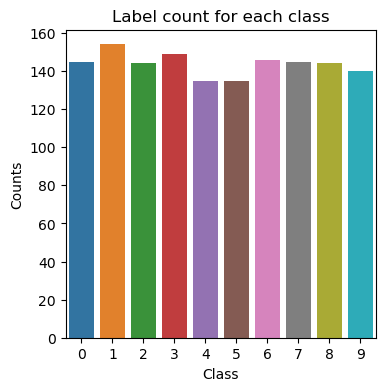

In [334]:
## Analysing the no. of samples for each class

labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(1,1)
ax = sns.barplot(x = labels, y = counts)
ax.set(xticks = labels, xticklabels = labels, title = "Label count for each class", xlabel = "Class", ylabel = "Counts")
plt.show()

From the above bargraph, we can see that most of the class labels have around the same number of samples

In [348]:
sgd_multiclass = SGDClassifier(loss = "log_loss", learning_rate="constant", fit_intercept=True, eta0 = 0.01, max_iter=10)
from sklearn.model_selection import GridSearchCV
param_grid = parameters = {'penalty': ['l2', None], 'alpha': [1e-07, 1e-06, 1e-05, 1e-04], 
                           'eta0': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(estimator = sgd_multiclass,
                          param_grid=param_grid,
                          cv = 5, verbose = 2, scoring = "roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=SGDClassifier(eta0=0.01, learning_rate='constant',
                                     loss='log_loss', max_iter=10),
             n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001],
                         'eta0': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l2', None]},
             scoring='roc_auc', verbose=2)

In [349]:
grid_search.best_params_

{'alpha': 1e-07, 'eta0': 0.001, 'penalty': 'l2'}

In [366]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
sgd_multiclass = grid_search.best_estimator_
preds = sgd_multiclass.predict(X_test)
roc_score = accuracy_score(y_test, preds)
print(f"The accuracy for the gyperparameter tuned SGDClassifier is {roc_score*100:.2f} %")

The accuracy for the gyperparameter tuned SGDClassifier is 96.39 %


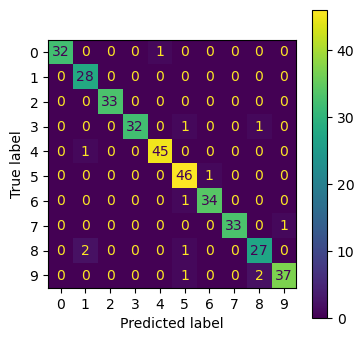

In [374]:
## Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds)